In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


# About graphs

A graph of 7 nodes:
0:[1, 2]
1:[0]
2:[0]
3:[4]
4:[3, 5]
5:[4]
7:[]

Nodes: [0, 1, 2, 3, 4, 5, 7]
Edges: [(0, 1), (0, 2), (3, 4), (4, 5)]


/Users/sacha/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


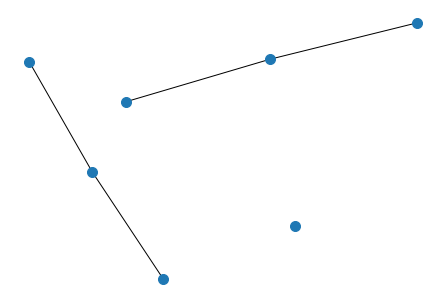

In [7]:
class Graph():
    def __init__(self):
        self.gdict = {}
        
    def add_node(self, node):
        """If node is not in a dictionary, add it."""
        if node not in self.gdict:
            self.gdict[node] = []
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        # Add node2 as a connection for node1, and the other way around
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def nodes(self):
        """Returns a list of nodes."""
        return list(self.gdict.keys())
    
    def edges(self):
        """Returns a list of edges."""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size=100)
    
# Test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_node(7)
print(g)
print('Nodes:',g.nodes())
print('Edges:',g.edges())
g.plot()

# Random networks

15 21
5 14
8 19
7 13
7 20
1 21
14 15
5 22
11 14
0 4
6 9
16 22
5 23
3 6
15 24
10 14
8 22
8 9
6 10
10 21
18 23
3 7
5 11
17 19
14 24


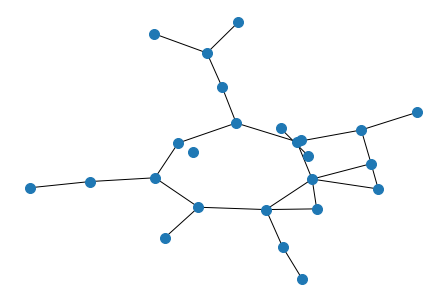

In [13]:
n_nodes = 25
n_edges = n_nodes 

g = Graph()
for i in range(n_nodes): 
    g.add_node(i)
edges = []
while len(edges)<n_edges: #to know this need a rand num generator
    n1 = np.random.randint(low=0,high=n_nodes)
    n2 = np.random.randint(low=0,high=n_nodes)
    if n2<n1:
        n1,n2 = n2,n1
    
    if (n1,n2) not in edges and n1!=n2:
        g.add_edge(n1,n2)
        edges.append((n1,n2))
        print(n1,n2)
    
g.plot()

[1, 1, 0, 2, 1, 4, 3, 3, 3, 2, 3, 2, 0, 1, 5, 3, 1, 1, 1, 2, 1, 3, 3, 2, 2]
[2. 8. 6. 7. 1. 1.]


Text(0, 0.5, 'Frequency')

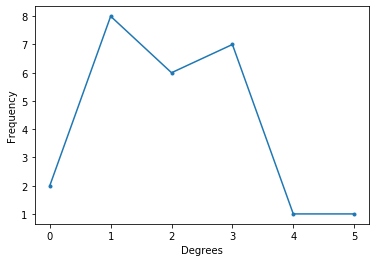

In [14]:
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))

print(degrees)
hist = np.zeros(max(degrees)+1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Homework

[1, 1, 0, 2, 1, 4, 3, 3, 3, 2, 3, 2, 0, 1, 5, 3, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[32.  8.  6.  7.  1.  1.]


Text(0, 0.5, 'Frequency')

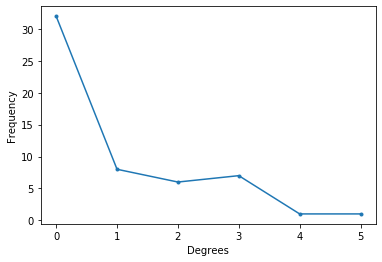

In [15]:
hw_nodes = 55
hw_edges = hw_nodes

for i in range (0, hw_nodes): 
    g.add_node(i)                          
    if i!=i:                   # I did this part twice because i wasn't sure if this adding a new node is picking
        g.add_edge(hw_nodes)   # a specific node that I don't know or if should selct a particular one???
        
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))

print(degrees)
hist = np.zeros(max(degrees)+1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')

[1, 1, 0, 2, 1, 4, 3, 3, 3, 2, 3, 2, 0, 1, 5, 3, 1, 1, 1, 2, 1, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[32.  9.  6.  7.  1.  1.]


Text(0, 0.5, 'Frequency')

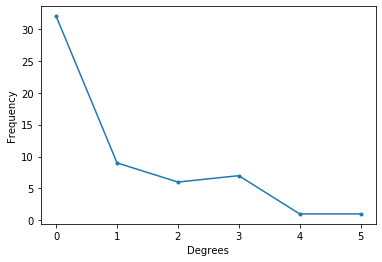

In [17]:
hw_nodes = 55
hw_edges = hw_nodes

for i in range (0, hw_nodes): 
    g.add_node(i)                           
    for i7 in range (0, hw_nodes):   #This one may be the right formulation
        g.add_node(i7)
        if i!=i7:                   
            g.add_edge(hw_nodes,hw_nodes) 
        
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))

print(degrees)
hist = np.zeros(max(degrees)+1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')

I don't really know how to write a code for the last homework question but I think that it would be something similar to the infection simulation that we did. 
We would have to add different colors for the 0th node ie. patient 0. 

The histogram graph would show us which degree/node is most likely to infect others by using the edges between them. I am unsure for now how to define this "transmission through edges" but I'm pretty sure that is the aim of my code

after figuring this out we would represent it with the history of all the trials we would have done.
